In [1]:
import quandl #used to fetch financial datasets
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
#Fetch the stock prices dataset of required number of companies.
# 1. TCS dataset:
api_key='Go7hB1-pvTbJuhLE_7J' 
data1=quandl.get('NSE/TCS')
print('TCS data:',data1)


TCS data:               Open     High      Low     Last    Close  Total Trade Quantity  \
Date                                                                           
2004-08-25  1198.7  1198.70   979.00   985.00   987.95            17116372.0   
2004-08-26   992.0   997.00   975.30   976.85   979.00             5055400.0   
2004-08-27   982.4   982.40   958.55   961.20   962.65             3830750.0   
2004-08-30   969.9   990.00   965.00   986.40   986.75             3058151.0   
2004-08-31   986.5   990.00   976.00   987.80   988.10             2649332.0   
...            ...      ...      ...      ...      ...                   ...   
2018-12-31  1908.0  1909.00  1886.15  1894.75  1893.05             1879740.0   
2019-01-01  1896.0  1910.00  1885.00  1905.90  1902.80             1094883.0   
2019-01-02  1905.0  1934.45  1900.00  1919.00  1923.30             2100463.0   
2019-01-03  1919.0  1944.95  1893.10  1901.00  1899.95             2611668.0   
2019-01-04  1900.0  1901.20  1

In [3]:
# 2. Infosys data: 
api_key='Go7hB1-pvTbJuhLE_7J' 
data2=quandl.get('NSE/INFY')
print("Infosys data:", data2)

Infosys data:                Open     High      Low     Last    Close  Total Trade Quantity  \
Date                                                                            
2011-06-29  2868.00  2907.00  2868.00  2880.00  2881.75              600094.0   
2011-06-30  2886.05  2919.00  2881.50  2903.10  2910.45             1417730.0   
2011-07-01  2935.00  2969.95  2924.10  2928.00  2934.15              800308.0   
2011-07-04  2966.65  2977.00  2935.00  2941.00  2938.95              514324.0   
2011-07-05  2957.00  2969.90  2926.00  2959.00  2956.45              802966.0   
...             ...      ...      ...      ...      ...                   ...   
2018-12-31   660.00   662.00   655.80   659.60   658.95             3373319.0   
2019-01-01   660.95   666.30   654.15   665.95   665.05             2943390.0   
2019-01-02   666.00   674.00   662.05   668.00   669.05             7416655.0   
2019-01-03   672.00   677.00   663.10   668.00   669.15             6827249.0   
2019-01-04   6

In [4]:
api_key='Go7hB1-pvTbJuhLE_7J' 
data3=quandl.get('NSE/LTI')
print("LTI data:", data3)

LTI data:                Open     High      Low     Last    Close  Total Trade Quantity  \
Date                                                                            
2016-07-21   667.00   710.00   666.00   696.95   697.60            11824029.0   
2016-07-22   700.00   708.70   696.20   697.30   700.00              820402.0   
2016-07-25   701.00   701.00   692.00   693.80   693.05              260240.0   
2016-07-26   694.90   701.50   690.00   693.20   692.15              312995.0   
2016-07-27   692.10   697.65   687.05   689.15   689.90              168708.0   
...             ...      ...      ...      ...      ...                   ...   
2018-12-31  1743.95  1749.00  1713.90  1721.65  1731.20               79325.0   
2019-01-01  1731.20  1733.80  1705.10  1709.00  1713.45               36404.0   
2019-01-02  1722.90  1753.90  1705.00  1727.20  1733.55              131933.0   
2019-01-03  1733.55  1760.00  1731.00  1734.20  1738.15              188170.0   
2019-01-04  1744.0

In [5]:
api_key='Go7hB1-pvTbJuhLE_7J' 
data4=quandl.get('NSE/PERSISTENT')
print("Persistent data:", data4)

Persistent data:               Open    High     Low    Last   Close  Total Trade Quantity  \
Date                                                                       
2010-04-06  361.60  447.30  361.60  404.70  406.35            14945321.0   
2010-04-07  408.00  410.50  392.75  402.80  402.55             3828050.0   
2010-04-08  400.00  431.90  398.30  412.80  414.30             8368229.0   
2010-04-09  415.00  419.85  408.30  410.00  410.60             1580108.0   
2010-04-12  411.80  415.25  395.60  401.00  401.35              773464.0   
...            ...     ...     ...     ...     ...                   ...   
2018-12-31  634.80  635.50  620.00  623.85  622.65              223468.0   
2019-01-01  628.00  629.50  624.00  624.50  626.10               51296.0   
2019-01-02  621.05  644.35  620.00  628.00  625.20              205680.0   
2019-01-03  613.35  625.00  606.60  613.00  613.55              388186.0   
2019-01-04  616.05  619.65  571.70  578.80  577.30              721076.

In [6]:
# 5. Tech Mahindra data:
api_key='Go7hB1-pvTbJuhLE_7J' 
data5=quandl.get('NSE/TECHM')
print('Tech Mahindra data:',data5)


Tech Mahindra data:               Open    High     Low    Last   Close  Total Trade Quantity  \
Date                                                                       
2006-08-28  521.00  569.00  502.00  553.00  554.25            15166163.0   
2006-08-29  555.00  563.90  535.55  536.10  539.30             3929113.0   
2006-08-30  537.00  542.90  521.50  529.00  528.10             2034983.0   
2006-08-31  525.00  544.00  515.00  539.35  538.45             1670990.0   
2006-09-01  539.00  549.00  535.10  541.35  541.85             1176195.0   
...            ...     ...     ...     ...     ...                   ...   
2018-12-31  720.00  726.45  715.10  721.65  723.15             1814655.0   
2019-01-01  715.00  721.45  715.00  720.60  719.10              815535.0   
2019-01-02  719.15  729.70  709.25  712.15  712.05             2576769.0   
2019-01-03  715.05  716.00  685.25  693.00  691.25             3558015.0   
2019-01-04  694.45  697.05  672.50  681.40  681.10             39261

#info of data fetched:
print("TCS data:",data1.info())
print("Infosys data:",data2.info())

In [7]:
#select only Close column for further predictions.
df1=data1[['Close']]
df2=data2[['Close']]
df3=data3[['Close']]
df4=data4[['Close']]
df5=data5[['Close']]
print('TCS:',df1.head())
print('\n')
print('Infosys:',df2.head())
print('\n')
print('LTI:',df3.head())
print('\n')
print('Persistent:',df4.head())
print('\n')
print('Tech Mahindra:',df5.head())

TCS:              Close
Date              
2004-08-25  987.95
2004-08-26  979.00
2004-08-27  962.65
2004-08-30  986.75
2004-08-31  988.10


Infosys:               Close
Date               
2011-06-29  2881.75
2011-06-30  2910.45
2011-07-01  2934.15
2011-07-04  2938.95
2011-07-05  2956.45


LTI:              Close
Date              
2016-07-21  697.60
2016-07-22  700.00
2016-07-25  693.05
2016-07-26  692.15
2016-07-27  689.90


Persistent:              Close
Date              
2010-04-06  406.35
2010-04-07  402.55
2010-04-08  414.30
2010-04-09  410.60
2010-04-12  401.35


Tech Mahindra:              Close
Date              
2006-08-28  554.25
2006-08-29  539.30
2006-08-30  528.10
2006-08-31  538.45
2006-09-01  541.85


Text(0, 0.5, 'Stock Price')

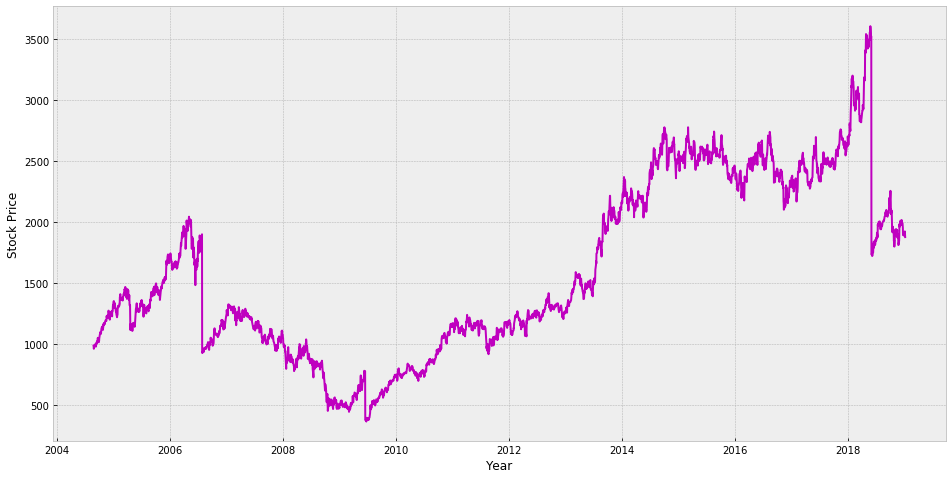

In [8]:
plt.figure(figsize=(16,8))
plt.plot(df1.index, df1['Close'],'m')
plt.xlabel("Year")
plt.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

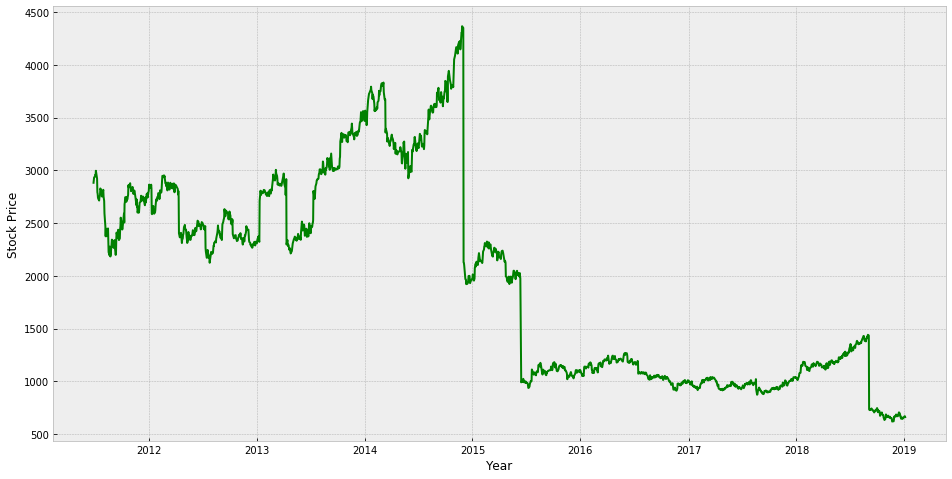

In [9]:
plt.figure(figsize=(16,8))
plt.plot(df2.index, df2['Close'],'g')
plt.xlabel("Year")
plt.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

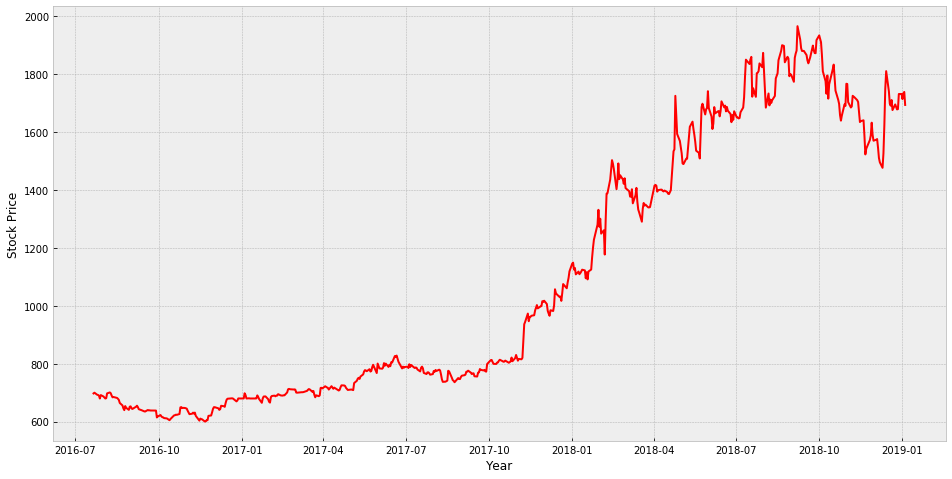

In [10]:
plt.figure(figsize=(16,8))
plt.plot(df3.index, df3['Close'],'r')
plt.xlabel("Year")
plt.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

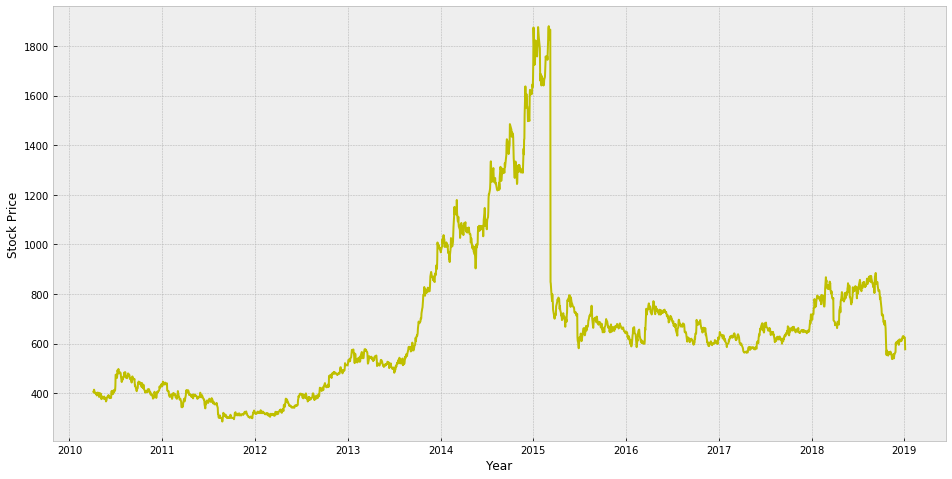

In [11]:
plt.figure(figsize=(16,8))
plt.plot(df4.index, df4['Close'],'y')
plt.xlabel("Year")
plt.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

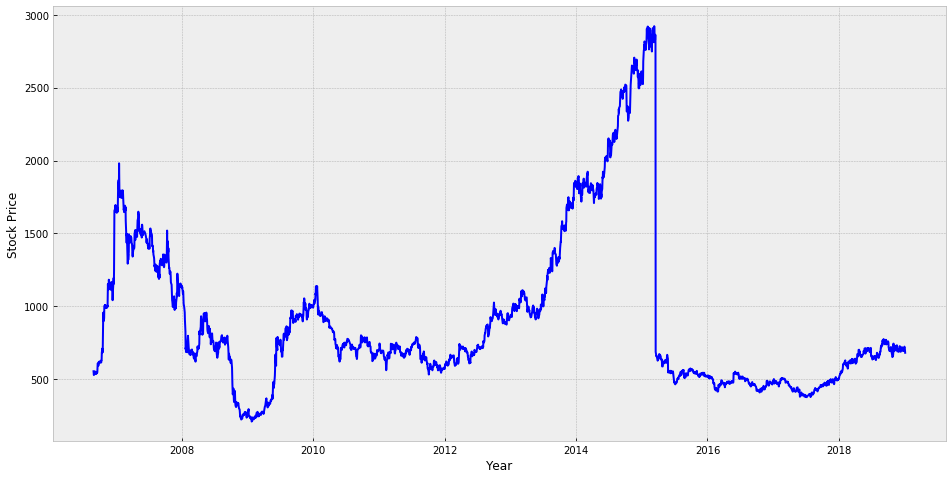

In [12]:
plt.figure(figsize=(16,8))
plt.plot(df5.index, df5['Close'],'b')
plt.xlabel("Year")
plt.ylabel("Stock Price")

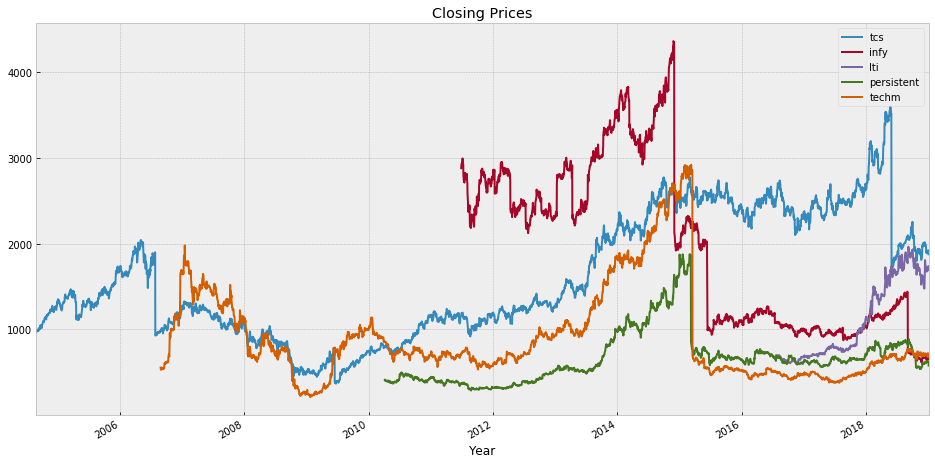

In [13]:
# All in one Close column:
df1['Close'].plot(label='tcs',figsize=(16,8),title='Closing Prices')
df2['Close'].plot(label='infy')
df3['Close'].plot(label='lti')
df4['Close'].plot(label='persistent')
df5['Close'].plot(label='techm')
plt.xlabel('Year')
plt.legend()

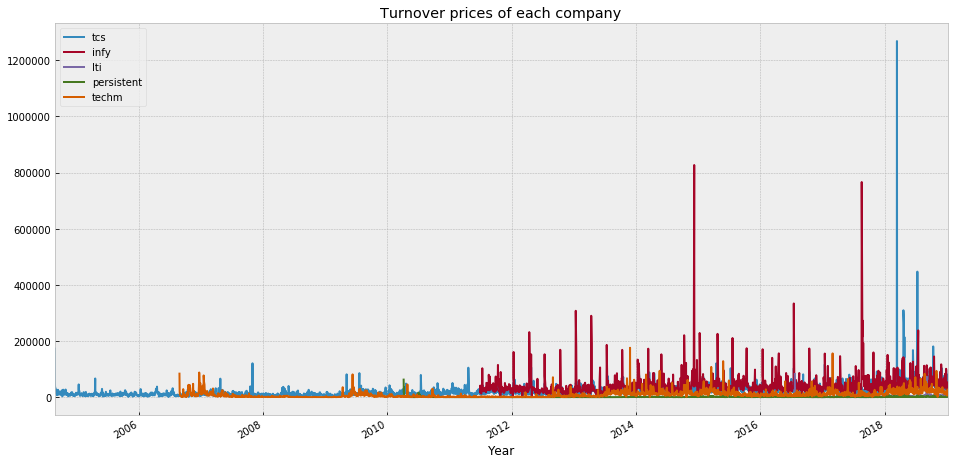

In [14]:
data1['Turnover (Lacs)'].plot(label='tcs',figsize=(16,8),title='Turnover prices of each company')
data2['Turnover (Lacs)'].plot(label='infy')
data3['Turnover (Lacs)'].plot(label='lti')
data4['Turnover (Lacs)'].plot(label='persistent')
data5['Turnover (Lacs)'].plot(label='techm')
plt.xlabel('Year')
#plt.ylabel('Stock Prices')
plt.legend()
plt.show()


print(df.info())
print(df.describe())


In [15]:
#future_out created for predicting future stock prices mentioned the number of days in future 

future_days=5
df1['Prediction1']=df1[['Close']].shift(-future_days)
print('TCS:',df1.tail(5))
print('\n')
df2['Prediction2']=df2[['Close']].shift(-future_days)
print('Infosys:',df2.tail(5))
print('\n')
df3['Prediction3']=df3[['Close']].shift(-future_days)
print('LTI:',df3.tail(5))
print('\n')
df4['Prediction4']=df4[['Close']].shift(-future_days)
print('Persistent:',df4.tail(5))
print('\n')
df5['Prediction5']=df5[['Close']].shift(-future_days)
print('Tech Mahindra:',df5.tail(5))
#data5['Close']

TCS:               Close  Prediction1
Date                            
2018-12-31  1893.05          NaN
2019-01-01  1902.80          NaN
2019-01-02  1923.30          NaN
2019-01-03  1899.95          NaN
2019-01-04  1876.85          NaN


Infosys:              Close  Prediction2
Date                           
2018-12-31  658.95          NaN
2019-01-01  665.05          NaN
2019-01-02  669.05          NaN
2019-01-03  669.15          NaN
2019-01-04  661.05          NaN


LTI:               Close  Prediction3
Date                            
2018-12-31  1731.20          NaN
2019-01-01  1713.45          NaN
2019-01-02  1733.55          NaN
2019-01-03  1738.15          NaN
2019-01-04  1693.20          NaN


Persistent:              Close  Prediction4
Date                           
2018-12-31  622.65          NaN
2019-01-01  626.10          NaN
2019-01-02  625.20          NaN
2019-01-03  613.55          NaN
2019-01-04  577.30          NaN


Tech Mahindra:              Close  Prediction5
Date

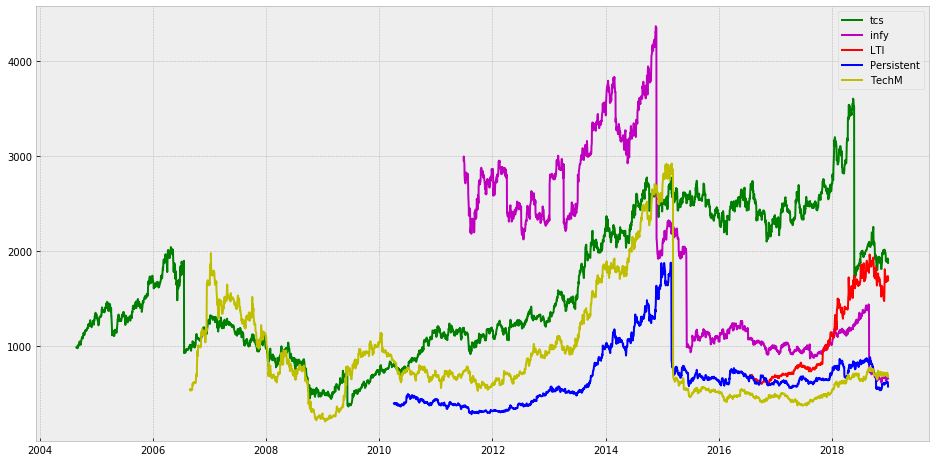

In [16]:
plt.figure(figsize=(16,8))
plt.plot(df1['Prediction1'], 'g', label="tcs")
plt.plot(df2['Prediction2'], 'm', label="infy")
plt.plot(df3['Prediction3'], 'r', label="LTI")
plt.plot(df4['Prediction4'], 'b', label="Persistent")
plt.plot(df5['Prediction5'], 'y', label="TechM")
plt.xlabel='Year'
plt.ylabel='Stock price'
plt.legend()
plt.show()

In [17]:
#create independent variable for datasets.
#1. X1- TCS
X1=np.array(df1.drop(['Prediction1'],1))
X1=X1[:-future_days] #since forecast_out=1 , last 1 value is removed.#remove the last 'n' rows
print('TCS X1:')
print(X1)
print('\n')
#2. X2- Infosys
X2=np.array(df2.drop(['Prediction2'],1))
X2=X2[:-future_days]
print('Infosys X2:')
print(X2)
print('\n')
#3. X3- LTI
X3=np.array(df3.drop(['Prediction3'],1))
X3=X3[:-future_days]
print('LTI X3:')
print(X3)
print('\n')
#4. X4- Persistent
X4=np.array(df4.drop(['Prediction4'],1))
X4=X4[:-future_days]
print('Persistent X4:')
print(X4)
#5. X5- Tech Mahindra
X5=np.array(df5.drop(['Prediction5'],1))
X5=X5[:-future_days]
print('Tech Mahindra X5:')
print(X5)

TCS X1:
[[ 987.95]
 [ 979.  ]
 [ 962.65]
 ...
 [1889.2 ]
 [1908.95]
 [1896.05]]


Infosys X2:
[[2881.75]
 [2910.45]
 [2934.15]
 ...
 [ 644.05]
 [ 656.8 ]
 [ 656.95]]


LTI X3:
[[ 697.6 ]
 [ 700.  ]
 [ 693.05]
 [ 692.15]
 [ 689.9 ]
 [ 679.9 ]
 [ 691.8 ]
 [ 686.9 ]
 [ 683.65]
 [ 680.  ]
 [ 681.05]
 [ 697.65]
 [ 700.9 ]
 [ 698.3 ]
 [ 690.25]
 [ 684.05]
 [ 685.2 ]
 [ 681.95]
 [ 678.95]
 [ 674.95]
 [ 664.6 ]
 [ 656.05]
 [ 645.95]
 [ 639.85]
 [ 653.9 ]
 [ 647.8 ]
 [ 640.9 ]
 [ 651.75]
 [ 652.9 ]
 [ 645.6 ]
 [ 643.95]
 [ 651.55]
 [ 655.2 ]
 [ 650.3 ]
 [ 643.05]
 [ 639.75]
 [ 636.95]
 [ 635.65]
 [ 635.  ]
 [ 640.3 ]
 [ 639.  ]
 [ 639.35]
 [ 638.5 ]
 [ 638.55]
 [ 638.2 ]
 [ 637.75]
 [ 638.35]
 [ 614.65]
 [ 617.95]
 [ 622.9 ]
 [ 618.25]
 [ 615.55]
 [ 614.75]
 [ 612.35]
 [ 611.3 ]
 [ 605.05]
 [ 609.05]
 [ 618.8 ]
 [ 621.65]
 [ 622.3 ]
 [ 624.2 ]
 [ 623.6 ]
 [ 626.45]
 [ 649.25]
 [ 650.25]
 [ 647.05]
 [ 647.65]
 [ 647.3 ]
 [ 645.1 ]
 [ 638.05]
 [ 632.35]
 [ 625.95]
 [ 627.5 ]
 [ 631.3 ]
 [ 627.75]

In [18]:
#dependent dataset y
y1=np.array(df1['Prediction1'])
#get all y values except the last 'n' rows
y1=y1[:-future_days]
print('TCS y1:',y1)
print('\n')

#Infosys:
y2=np.array(df2['Prediction2'])
y2=y2[:-future_days]
print('Infosys y2:',y2)
print('\n')

#LTI:
y3=np.array(df3['Prediction3'])
y3=y3[:-future_days]
print('LTI y3:',y3)

#Persistent:
y4=np.array(df4['Prediction4'])
y4=y4[:-future_days]
print('Persistent y4:',y4)

#Tech Mahindra:
y5=np.array(df5['Prediction5'])
y5=y5[:-future_days]
print('Tech Mahindra y5:',y5)



TCS y1: [ 987.9   993.65  997.85 ... 1923.3  1899.95 1876.85]


Infosys y2: [2953.7  2995.7  2976.55 ...  669.05  669.15  661.05]


LTI y3: [ 679.9   691.8   686.9   683.65  680.    681.05  697.65  700.9   698.3
  690.25  684.05  685.2   681.95  678.95  674.95  664.6   656.05  645.95
  639.85  653.9   647.8   640.9   651.75  652.9   645.6   643.95  651.55
  655.2   650.3   643.05  639.75  636.95  635.65  635.    640.3   639.
  639.35  638.5   638.55  638.2   637.75  638.35  614.65  617.95  622.9
  618.25  615.55  614.75  612.35  611.3   605.05  609.05  618.8   621.65
  622.3   624.2   623.6   626.45  649.25  650.25  647.05  647.65  647.3
  645.1   638.05  632.35  625.95  627.5   631.3   627.75  631.3   620.15
  603.65  610.65  608.95  608.05  600.5   601.15  605.2   605.2   620.1
  621.4   631.9   643.8   650.    650.    647.25  646.    640.7   643.15
  654.85  653.4   651.25  664.55  675.1   679.2   680.05  680.3   680.6
  680.1   677.6   670.    673.2   680.25  680.    680.05  680.3 

In [19]:
#split data
x_train1,x_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.2)

x_train2,x_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.2)

x_train3,x_test3,y_train3,y_test3=train_test_split(X3,y3,test_size=0.2)

x_train4,x_test4,y_train4,y_test4=train_test_split(X4,y4,test_size=0.2)

x_train5,x_test5,y_train5,y_test5=train_test_split(X5,y5,test_size=0.2)

In [20]:
svr_rbf1=SVR(kernel='rbf',C=1e3,gamma=0.1)
svr_rbf1.fit(x_train1,y_train1)

svr_rbf2=SVR(kernel='rbf',C=1e3,gamma=0.1)
svr_rbf2.fit(x_train2,y_train2)

svr_rbf3=SVR(kernel='rbf',C=1e3,gamma=0.1)
svr_rbf3.fit(x_train3,y_train3)

svr_rbf4=SVR(kernel='rbf',C=1e3,gamma=0.1)
svr_rbf4.fit(x_train4,y_train4)

svr_rbf5=SVR(kernel='rbf',C=1e3,gamma=0.1)
svr_rbf5.fit(x_train5,y_train5)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
# 1. for tcs data:
accuracy1=svr_rbf1.score(x_test1,y_test1)
print('TCS prediction accuracy score: ',accuracy1)

# 2. for infosys data:
accuracy2=svr_rbf2.score(x_test2,y_test2)
print('Infosys prediction accuracy score: ',accuracy2)

# 3. for LTI data:
accuracy3=svr_rbf3.score(x_test3,y_test3)
print('LTI prediction accuracy score: ',accuracy3)

# 4. for Persistent data:
accuracy4=svr_rbf4.score(x_test4,y_test4)
print('Persistent prediction accuracy score: ',accuracy4)

# 5. for Tech Mahindra data:
accuracy5=svr_rbf5.score(x_test5,y_test5)
print('Tech Mahindra prediction accuracy score:',accuracy5)




TCS prediction accuracy score:  0.9411576849951669
Infosys prediction accuracy score:  0.8630031364957739
LTI prediction accuracy score:  0.9085768866986369
Persistent prediction accuracy score:  0.8683744516458691
Tech Mahindra prediction accuracy score: 0.8561461642970922


#Linear Regression model
lr=LinearRegression()
lr.fit(x_train1,y_train1)

lr_confidence=lr.score(x_test1,y_test1)
lr_confidence

In [22]:
#set x_future equal to the last 25 rows of the original data set from  Close column
x_future1=np.array(df1.drop(['Prediction1'],1))[-future_days:]
print('tcs',x_future1)

x_future2=np.array(df2.drop(['Prediction2'],1))[-future_days:]
print('infy',x_future2)

x_future3=np.array(df3.drop(['Prediction3'],1))[-future_days:]
print('lti',x_future3)

x_future4=np.array(df4.drop(['Prediction4'],1))[-future_days:]
print('persistent',x_future4)

x_future5=np.array(df5.drop(['Prediction5'],1))[-future_days:]
print('techm',x_future5)

tcs [[1893.05]
 [1902.8 ]
 [1923.3 ]
 [1899.95]
 [1876.85]]
infy [[658.95]
 [665.05]
 [669.05]
 [669.15]
 [661.05]]
lti [[1731.2 ]
 [1713.45]
 [1733.55]
 [1738.15]
 [1693.2 ]]
persistent [[622.65]
 [626.1 ]
 [625.2 ]
 [613.55]
 [577.3 ]]
techm [[723.15]
 [719.1 ]
 [712.05]
 [691.25]
 [681.1 ]]


#print the  lr model pedictions for the next 'n ' days
lr_prediction=lr.predict(x_forecast)
lr_prediction

In [23]:
svm_prediction1=svr_rbf1.predict(x_future1)
print(svm_prediction1)

svm_prediction2=svr_rbf2.predict(x_future2)
print(svm_prediction2)

svm_prediction3=svr_rbf3.predict(x_future3)
print(svm_prediction3)

svm_prediction4=svr_rbf4.predict(x_future4)
print(svm_prediction4)

svm_prediction5=svr_rbf5.predict(x_future5)
print(svm_prediction5)



[1891.05304529 1916.16759133 1724.62056437 1651.533159   1718.07994571]
[653.86542058 646.37262169 696.26050436 695.14402767 668.40001845]
[1624.55775206 1774.62524405 1697.92859772 1471.67869008 1762.89247055]
[624.9944581  618.2939931  620.67572388 619.34277173 569.35227275]
[712.4094564  708.60142994 710.9068933  671.06405466 719.24479789]


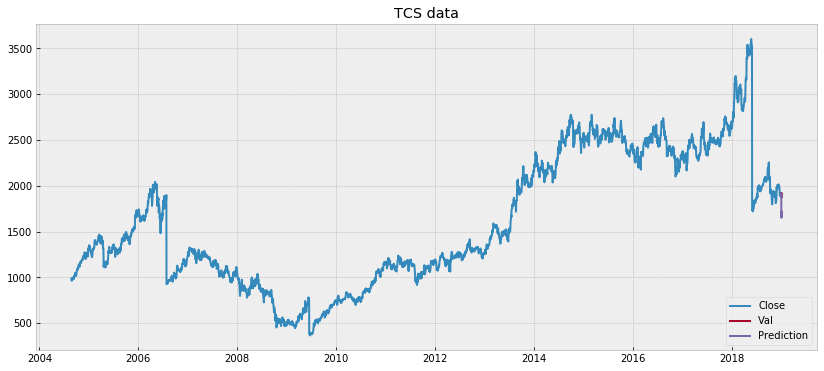

In [24]:
predictions = svm_prediction1
valid =  df1[X1.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
#valid1
plt.figure(figsize=(14,6))
plt.title('TCS data')
plt.xlabel='Days'
plt.ylabel='Close Price USD ($)'
plt.plot(df1['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Close', 'Val', 'Prediction' ], loc='lower right')
plt.show()

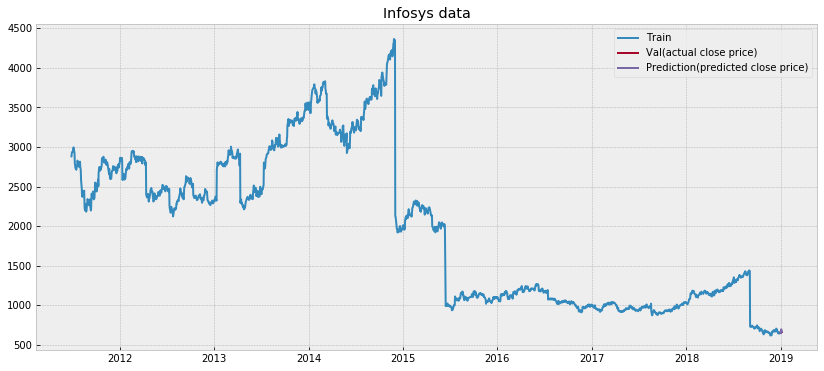

In [25]:
predictions = svm_prediction2
#Plot the data
valid =  df2[X2.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
valid
plt.figure(figsize=(14,6))
plt.title('Infosys data')
plt.xlabel='Days'
plt.ylabel='Close Price'
plt.plot(df2['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val(actual close price)', 'Prediction(predicted close price)', ], loc='upper right')
plt.show()

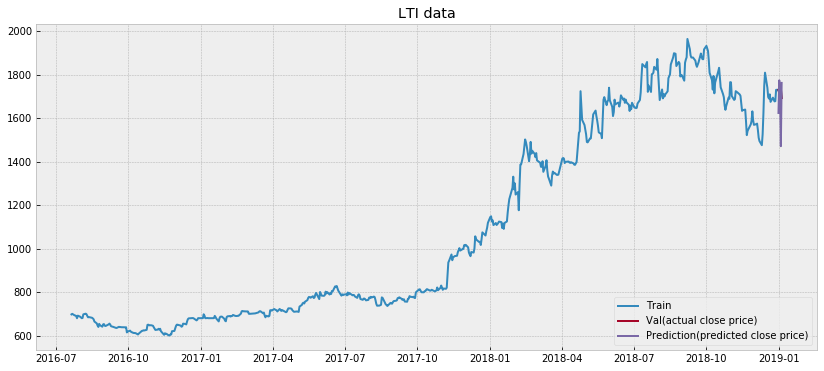

In [26]:
#Visualize the data
predictions = svm_prediction3
#Plot the data
valid3 =  df3[X3.shape[0]:]
valid3['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices

plt.figure(figsize=(14,6))
plt.title('LTI data')
plt.xlabel='Year'
plt.ylabel='Close Price'
plt.plot(df3['Close'])
plt.plot(valid3[['Close','Predictions']])
plt.legend(['Train', 'Val(actual close price)', 'Prediction(predicted close price)' ], loc='lower right')
plt.show()

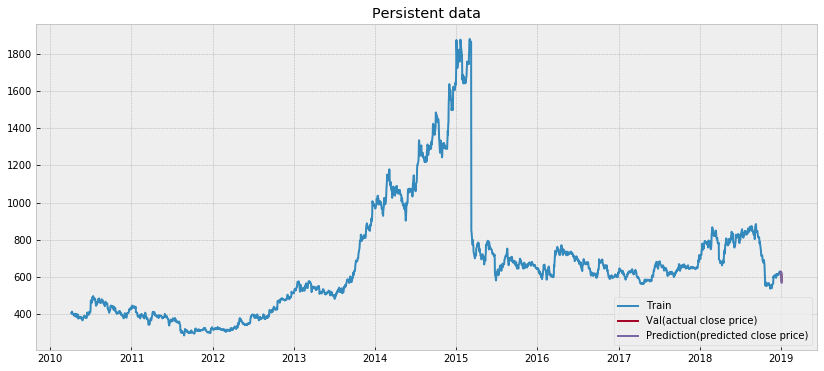

In [27]:
#Visualize the data
predictions = svm_prediction4
#Plot the data
valid =  df4[X4.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
valid
plt.figure(figsize=(14,6))
plt.title('Persistent data')
plt.xlabel='Days'
plt.ylabel='Close Price'
plt.plot(df4['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val(actual close price)', 'Prediction(predicted close price)' ], loc='lower right')
plt.show()

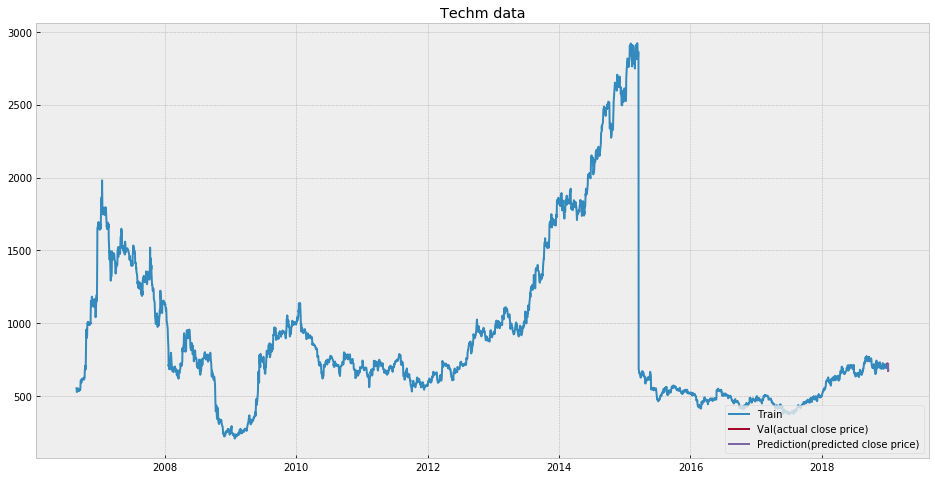

In [28]:
#Visualize the data
predictions = svm_prediction5
#Plot the data
valid =  df5[X5.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
valid
plt.figure(figsize=(16,8))
plt.title('Techm data')
plt.xlabel='Days'
plt.ylabel='Close Price'
plt.plot(df5['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val(actual close price)', 'Prediction(predicted close price)' ], loc='lower right')
plt.show()